<a href="https://colab.research.google.com/github/samuelmap1/Projetos/blob/main/NBA_Players_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

LEITURA DOS ARQUIVOS

In [2]:
nba = pd.read_csv("players.csv")
nba

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_round,draft_number
0,1630173,Precious,Achiuwa,Forward,6-8,225,1999-09-19,Nigeria,Memphis,2020,1.0,20.0
1,203500,Steven,Adams,Center,6-11,265,1993-07-20,New Zealand,Pittsburgh,2013,1.0,12.0
2,1628389,Bam,Adebayo,Center-Forward,6-9,255,1997-07-18,USA,Kentucky,2017,1.0,14.0
3,1630534,Ochai,Agbaji,Guard,6-5,215,2000-04-20,USA,Kansas,2022,1.0,14.0
4,1630583,Santi,Aldama,Forward-Center,7-0,215,2001-01-10,Spain,Loyola-Maryland,2021,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
543,201152,Thaddeus,Young,Forward,6-8,235,1988-06-21,USA,Georgia Tech,2007,1.0,12.0
544,1629027,Trae,Young,Guard,6-1,164,1998-09-19,USA,Oklahoma,2018,1.0,5.0
545,1630209,Omer,Yurtseven,Center,6-11,275,1998-06-19,Turkey,Georgetown,2020,NaN,NaN
546,203469,Cody,Zeller,Forward-Center,6-11,240,1992-10-05,USA,Indiana,2013,1.0,4.0


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerid      548 non-null    int64  
 1   fname         548 non-null    object 
 2   lname         548 non-null    object 
 3   position      548 non-null    object 
 4   height        548 non-null    object 
 5   weight        548 non-null    int64  
 6   birthday      548 non-null    object 
 7   country       548 non-null    object 
 8   school        538 non-null    object 
 9   draft_year    548 non-null    int64  
 10  draft_round   409 non-null    float64
 11  draft_number  408 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 51.5+ KB


In [4]:
nba.describe()

,playerid,weight,draft_year,draft_round,draft_number
count,5.480000e+02,548.000000,548.000000,409.000000,408.000000
mean,1.302895e+06,215.854015,2017.503650,1.300733,22.563725
std,6.017886e+05,24.207071,4.158424,0.464446,15.584465
min,2.544000e+03,160.000000,2003.000000,0.000000,1.000000
25%,1.626167e+06,200.000000,2015.000000,1.000000,9.000000
50%,1.629136e+06,215.000000,2019.000000,1.000000,20.000000
75%,1.630533e+06,232.000000,2021.000000,2.000000,34.000000
max,1.641645e+06,290.000000,2022.000000,2.000000,60.000000


TRATAMENTO DE VARIÁVEIS

In [5]:
missing_draft_number = nba[nba['draft_number'].isnull() & ~nba['draft_round'].isnull()]

missing_draft_number

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_round,draft_number
328,204456,T.J.,McConnell,Guard,6-1,190,1992-03-25,USA,Arizona,2015,0.0,NaN


In [6]:
nba['draft_round'].value_counts()

1.0    284
2.0    124
0.0      1
Name: draft_round, dtype: int64

In [7]:
nba['draft_number'].value_counts()

9.0     15
1.0     15
3.0     13
11.0    12
4.0     12
7.0     12
5.0     12
10.0    11
12.0    11
6.0     11
24.0    10
8.0     10
15.0    10
27.0    10
19.0     9
13.0     9
30.0     9
14.0     9
2.0      8
26.0     8
32.0     8
25.0     8
16.0     8
42.0     8
20.0     8
41.0     7
46.0     7
29.0     7
35.0     7
22.0     7
17.0     7
45.0     7
31.0     6
23.0     6
18.0     6
21.0     6
28.0     5
37.0     5
44.0     5
34.0     5
38.0     5
52.0     4
51.0     4
50.0     4
40.0     4
49.0     4
33.0     4
43.0     4
36.0     4
48.0     3
39.0     3
55.0     3
47.0     3
53.0     2
60.0     2
54.0     2
58.0     2
59.0     1
57.0     1
Name: draft_number, dtype: int64

In [8]:
nba.fillna('Undrafted', inplace=True)

nba['draft_round'] = nba['draft_round'].replace({1: 'First Round', 2: 'Second Round'})
nba['draft_number'] = nba['draft_number'].replace({0:'Undrafted'})

In [9]:
nba['draft_number'] = nba['draft_number'].astype(str).str.rstrip('.0')

In [10]:
nba['player_name'] = nba['fname'] + ' ' + nba['lname']
nba['player_name']

0      Precious Achiuwa
1          Steven Adams
2           Bam Adebayo
3          Ochai Agbaji
4          Santi Aldama
             ...       
543      Thaddeus Young
544          Trae Young
545      Omer Yurtseven
546         Cody Zeller
547         Ivica Zubac
Name: player_name, Length: 548, dtype: object

In [11]:
def height_to_cm(height):
    feet, inches = map(int, height.split('-'))
    height_cm = round((feet * 30.48) + (inches * 2.54))

    return height_cm
nba['height_cm'] = nba['height'].apply(height_to_cm)

In [12]:
nba['weight_to_kg'] =  round(nba['weight']*0.453592)

In [13]:
nba['birthday'] = pd.to_datetime(nba['birthday'])

nba['birth_year'] = nba['birthday'].dt.year

In [14]:
lottery_picks = [str(i) for i in range(1, 15)]
lottery_picks

nba['lottery_pick'] = nba['draft_number'].apply(lambda x: 1 if str(x) in lottery_picks else 0)

In [15]:
nba['age_when_drafted'] = nba['draft_year'] - nba["birth_year"]

In [16]:
columns_to_drop = ['playerid','fname','lname','height','weight','birthday']
nba_clean = nba.drop(columns_to_drop, axis=1)
nba_clean

,position,country,school,draft_year,draft_round,draft_number,player_name,height_cm,weight_to_kg,birth_year,lottery_pick,age_when_drafted
0,Forward,Nigeria,Memphis,2020,First Round,2,Precious Achiuwa,203,102.0,1999,1,21
1,Center,New Zealand,Pittsburgh,2013,First Round,12,Steven Adams,211,120.0,1993,1,20
2,Center-Forward,USA,Kentucky,2017,First Round,14,Bam Adebayo,206,116.0,1997,1,20
3,Guard,USA,Kansas,2022,First Round,14,Ochai Agbaji,196,98.0,2000,1,22
4,Forward-Center,Spain,Loyola-Maryland,2021,First Round,3,Santi Aldama,213,98.0,2001,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
543,Forward,USA,Georgia Tech,2007,First Round,12,Thaddeus Young,203,107.0,1988,1,19
544,Guard,USA,Oklahoma,2018,First Round,5,Trae Young,185,74.0,1998,1,20
545,Center,Turkey,Georgetown,2020,Undrafted,Undrafted,Omer Yurtseven,211,125.0,1998,0,22
546,Forward-Center,USA,Indiana,2013,First Round,4,Cody Zeller,211,109.0,1992,1,21


~ARE NBA CHAMPIONS WORLD CHAMPIONS~? ARE INTERNATIONAL PLAYERS TAKING OVER THE NBA?

In [17]:
total_players = len(nba_clean)

non_usa_canada_players = len(nba_clean[(nba_clean['country'] != 'USA') & (nba_clean['country'] != 'Canada')])

percentage_non_usa_canada = (non_usa_canada_players / total_players) * 100

print(f'A porcentagem de jogadores que não são dos Estados Unidos ou Canadá é: {percentage_non_usa_canada:.2f}%')

A porcentagem de jogadores que não são dos Estados Unidos ou Canadá é: 19.16%


In [18]:
import plotly.express as px

international_players = nba_clean[(nba_clean['country'] != 'USA') & (nba_clean['country'] != 'Canada')]

country_counts = international_players['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Player Count']

fig = px.bar(country_counts, x='Country', y='Player Count', color='Country',
             title='Quantidade de Jogadores por País (excluindo USA e Canada)',
             labels={'Player Count': 'Número de Jogadores'})

fig.update_layout(xaxis_title='País', yaxis_title='Número de Jogadores')

fig.show()

In [19]:
country_counts['Country'].tolist()

['Australia',
 'France',
 'Germany',
 'Nigeria',
 'Spain',
 'Serbia',
 'Turkey',
 'Croatia',
 'Slovenia',
 'Greece',
 'Bahamas',
 'Japan',
 'Cameroon',
 'Montenegro',
 'Lithuania',
 'Ukraine',
 'Dominican Republic',
 'Latvia',
 'Senegal',
 'Argentina',
 'United Kingdom',
 'DRC',
 'Georgia',
 'Gabon',
 'Israel',
 'Jamaica',
 'Portugal',
 'Austria',
 'Bosnia and Herzegovina',
 'Brazil',
 'Finland',
 'Saint Lucia',
 'Czech Republic',
 'Switzerland',
 'Democratic Republic of the Congo',
 'South Sudan',
 'Italy',
 'Angola',
 'Sudan',
 'New Zealand',
 'Guinea',
 'Poland']

In [20]:
european_countries = ['France','Germany', 'Spain', 'Serbia', 'Turkey', 'Croatia', 'Slovenia', 'Greece',
 'Montenegro', 'Lithuania', 'Ukraine', 'Latvia', 'United Kingdom', 'Georgia', 'Israel', 'Portugal', 'Austria',
 'Bosnia and Herzegovina', 'Finland', 'Czech Republic', 'Switzerland', 'Italy', 'Poland']
central_american_countries = ['Bahamas','Dominican Republic','Jamaica','Saint Lucia']
south_american_countries = ['Argentina','Brazil']
african_countries = ['Nigeria','Cameroon','Senegal','DRC', 'Gabon','Democratic Republic of the Congo',
 'South Sudan', 'Angola',
 'Sudan','Guinea']
asian_countries = ['Japan']
oceania_countries = ['Australia', 'New Zealand']

In [21]:
country_counts = international_players['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Player Count']

country_to_continent = {
    **{country: 'Europa' for country in european_countries},
    **{country: 'América Central' for country in central_american_countries},
    **{country: 'América do Sul' for country in south_american_countries},
    **{country: 'África' for country in african_countries},
    **{country: 'Ásia' for country in asian_countries},
    **{country: 'Oceania' for country in oceania_countries}
}

country_counts['continent'] = country_counts['Country'].map(country_to_continent).fillna('Outro')

continent_player_counts = country_counts.groupby('continent')['Player Count'].sum().reset_index()

continent_player_counts.rename(columns={'Player Count': 'Total Player Count'}, inplace=True)

In [22]:
fig = px.bar(continent_player_counts, x='continent', y='Total Player Count',
             color='continent',
             title='Número Total de Jogadores por Continente',
             labels={'continent': 'Continente', 'Total Player Count': 'Número Total de Jogadores'})

fig.update_layout(xaxis_title='Continente', yaxis_title='Número Total de Jogadores')

fig.show()

In [23]:
usa_canada_players = nba_clean[(nba_clean['country'] == 'USA') | (nba_clean['country'] == 'Canada')]

In [24]:
international_players.describe().T

,count,mean,std,min,25%,50%,75%,max
draft_year,105.0,2017.161905,3.954364,2007.0,2014.0,2018.0,2021.0,2022.0
height_cm,105.0,204.733333,8.516123,178.0,201.0,206.0,211.0,224.0
weight_to_kg,105.0,102.761905,11.479517,78.0,95.0,103.0,109.0,132.0
birth_year,105.0,1996.066667,4.225078,1986.0,1993.0,1997.0,1999.0,2003.0
lottery_pick,105.0,0.314286,0.466457,0.0,0.0,0.0,1.0,1.0
age_when_drafted,105.0,21.095238,2.246894,19.0,20.0,20.0,22.0,29.0


In [25]:
usa_canada_players.describe().T

,count,mean,std,min,25%,50%,75%,max
draft_year,443.0,2017.584650,4.205570,2003.0,2015.0,2019.0,2021.0,2022.0
height_cm,443.0,198.051919,7.621683,175.0,193.0,198.0,203.0,218.0
weight_to_kg,443.0,96.762980,10.546612,73.0,89.0,95.0,103.0,129.0
birth_year,443.0,1996.397291,4.333411,1980.0,1994.0,1997.0,2000.0,2003.0
lottery_pick,443.0,0.347630,0.476756,0.0,0.0,0.0,1.0,1.0
age_when_drafted,443.0,21.187359,1.748593,19.0,20.0,21.0,22.0,28.0


<ipython-input-26-1ea4c0126403>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-1ea4c0126403>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



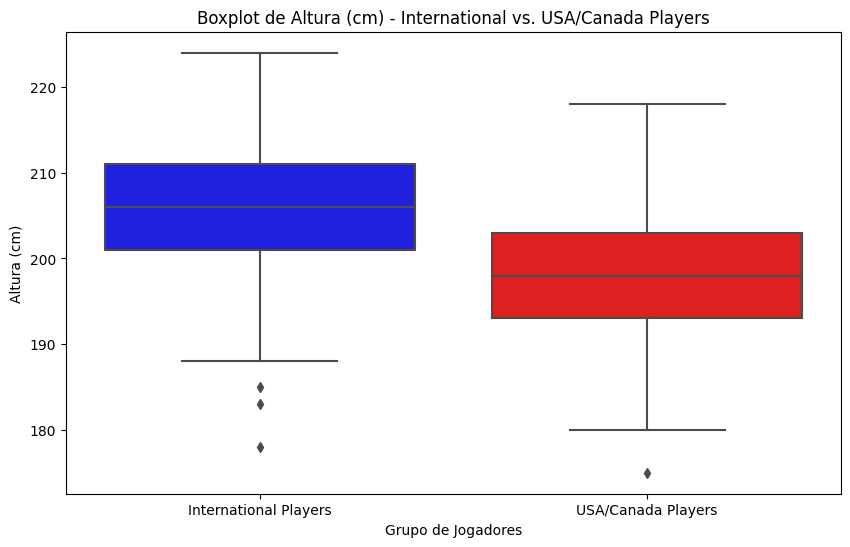

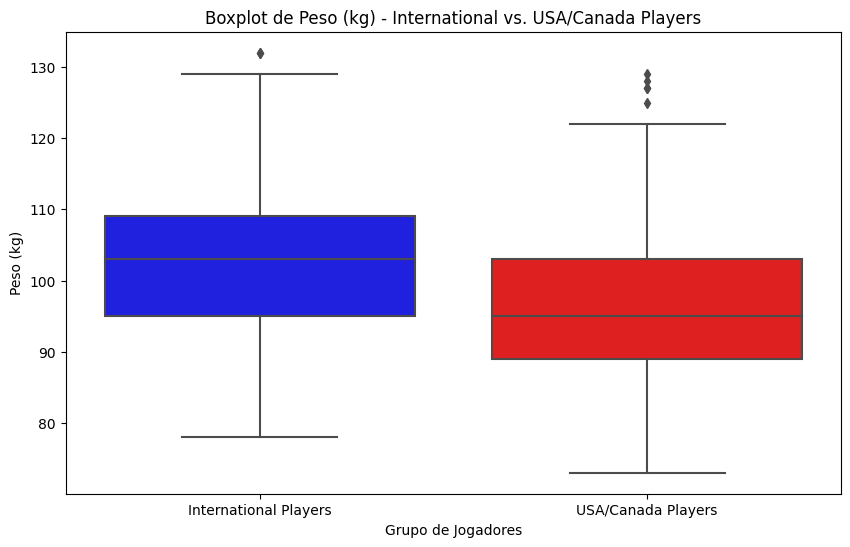

In [26]:
international_players['Player Type'] = 'International Players'
usa_canada_players['Player Type'] = 'USA/Canada Players'
nba_clean = pd.concat([international_players, usa_canada_players])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Player Type', y='height_cm', data=nba_clean, palette=['blue', 'red'])
plt.xlabel('Grupo de Jogadores')
plt.ylabel('Altura (cm)')
plt.title('Boxplot de Altura (cm) - International vs. USA/Canada Players')

plt.show()

# Crie um gráfico de boxplot para peso
plt.figure(figsize=(10, 6))
sns.boxplot(x='Player Type', y='weight_to_kg', data=nba_clean, palette=['blue', 'red'])
plt.xlabel('Grupo de Jogadores')
plt.ylabel('Peso (kg)')
plt.title('Boxplot de Peso (kg) - International vs. USA/Canada Players')

# Mostre o gráfico de peso
plt.show()

In [27]:
international_players['primary_position'] = international_players['position'].str.split('-').str[0]
usa_canada_players['primary_position'] = usa_canada_players['position'].str.split('-').str[0]

<ipython-input-27-f588acd43c42>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-f588acd43c42>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
international_players['primary_position'].value_counts()

Forward    46
Center     32
Guard      27
Name: primary_position, dtype: int64

In [29]:
usa_canada_players['primary_position'].value_counts()

Guard      231
Forward    172
Center      40
Name: primary_position, dtype: int64